In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import stitch
import utils
import features
import copy
import timeit

In [2]:
def convertResult(img):
    '''Because of your images which were loaded by opencv, 
    in order to display the correct output with matplotlib, 
    you need to reduce the range of your floating point image from [0,255] to [0,1] 
    and converting the image from BGR to RGB:'''
    img = np.array(img,dtype=float)/float(255)
    img = img[:,:,::-1]
    return img

In [3]:
#load images
list_images=utils.loadImages('data/myhouse',resize=0)

In [4]:
image1 = list_images[0]
image2 = list_images[1]

In [5]:
# findAndDescribeFeatures
def findAndDescribeFeatures(image, opt="ORB"):
    """find and describe features of @image,
        if opt='SURF', SURF algorithm is used.
        if opt='SIFT', SIFT algorithm is used.
        if opt='ORB', ORB algorithm is used.
        @Return keypoints and features of img"""
    # Getting gray image
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if opt == "SURF":
        md = cv2.xfeatures2d.SURF_create()
    if opt == "ORB":
        md = cv2.ORB_create(nfeatures=3000)
    if opt == "SIFT":
        md = cv2.xfeatures2d.SIFT_create()
    # Find interest points and Computing features.
    keypoints, features = md.detectAndCompute(grayImage, None)
    # Converting keypoints to numbers.
    # keypoints = np.float32(keypoints)
    features = np.float32(features)
    return keypoints, features

In [6]:
#extract keypoints and descriptors using sift 关键点并计算描述符
k0,f0=features.findAndDescribeFeatures(image1,opt='SIFT')
k1,f1=features.findAndDescribeFeatures(image2,opt='SIFT')

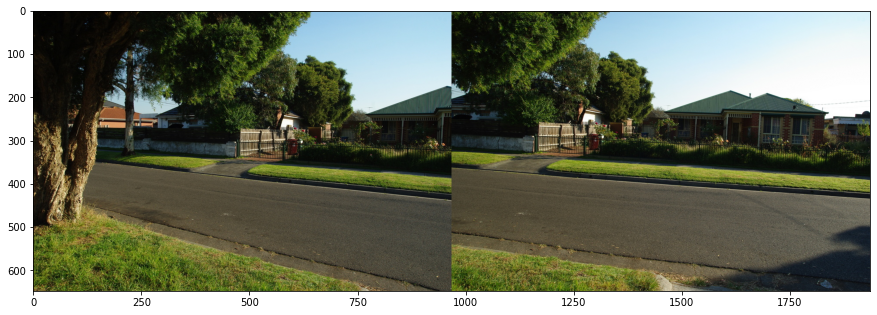

In [7]:
plt_img = np.concatenate((image1, image2), axis=1)
plt.figure(figsize=(15,15))
plt.imshow(convertResult(plt_img))

In [9]:
# 画线 
def drawMatches(src_img, src_kp, dst_img, dst_kp, matches, matchesMask):
    img= features.drawMatches(src_img, src_kp, dst_img, dst_kp, matches, matchesMask)
    return img
def drawKeypoints(img, kp):
    img0_kp=features.drawKeypoints(img, kp)
    return img0_kp

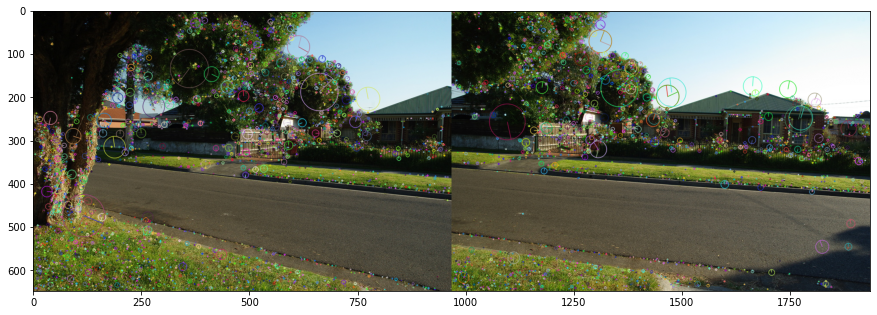

In [10]:
d_img1 = drawKeypoints(image1,k0)
d_img2 = drawKeypoints(image2,k1)
plt_img = np.concatenate((d_img1, d_img2), axis=1)
plt.figure(figsize=(15,15))
plt.imshow(convertResult(plt_img))

In [13]:
start = timeit.default_timer()
#extract keypoints and descriptors using sift 关键点并计算描述符
k0,f0=features.findAndDescribeFeatures(image1,opt='SIFT')
k1,f1=features.findAndDescribeFeatures(image2,opt='SIFT')
stop = timeit.default_timer()
print("Execution time: ", stop - start)

Execution time:  0.1329541


In [14]:
start = timeit.default_timer()
#wrap 2 image
#choose list_images[0] as desination
pano,non_blend,left_side,right_side=stitch.warpTwoImages(list_images[1],list_images[0],True)
stop = timeit.default_timer()
print("Execution time: ", stop - start)

Execution time:  0.38171710000000303


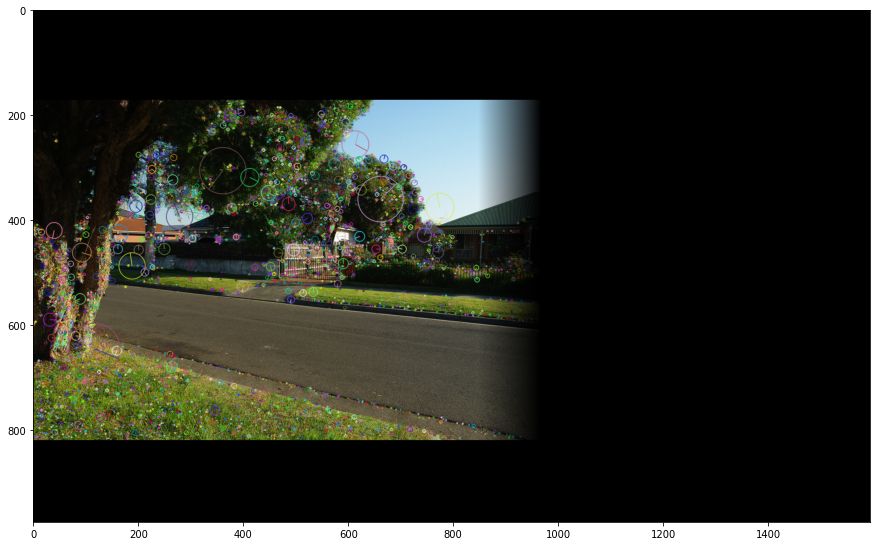

In [15]:
#display the leftside of pano before cropping
plt.figure(figsize=(15,15))
plt.imshow(convertResult(left_side))

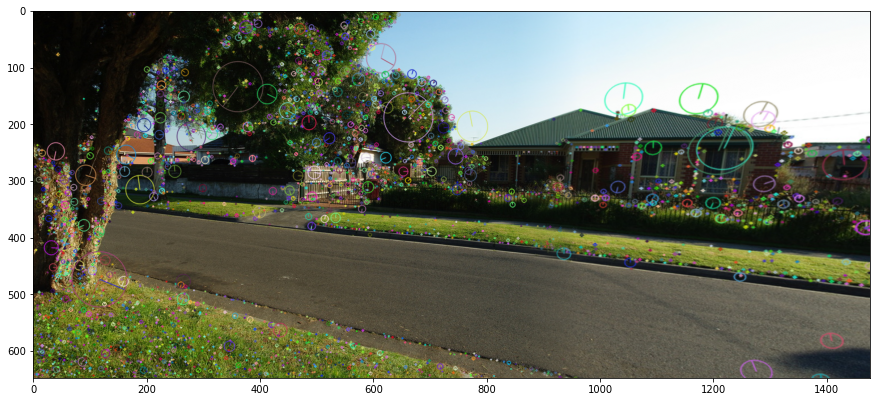

In [16]:
#display the leftside of pano before cropping
plt.figure(figsize=(15,15))
plt.imshow(convertResult(pano))

In [22]:
#load images
list_images2=utils.loadImages('data/cafe',resize=0)
print(len(list_images2))
start = timeit.default_timer()
#wrap 2 image
#choose list_images[0] as desination
pano,non_blend,left_side,right_side=stitch.warpTwoImages(list_images2[1],list_images2[0],True)
stop = timeit.default_timer()
print("Execution time: ", stop - start)

5
Execution time:  0.2999439000000166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


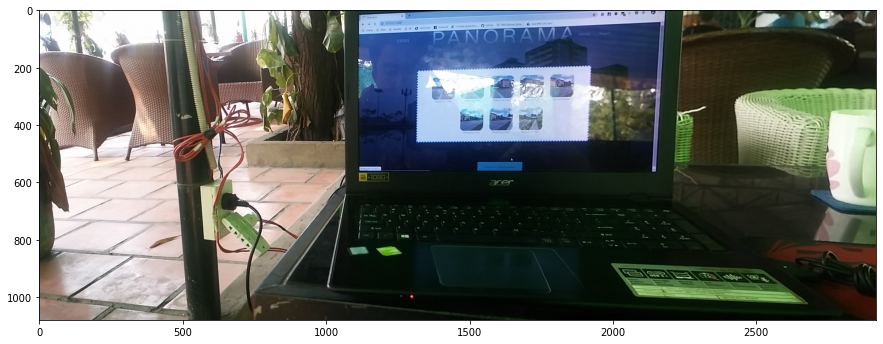

In [23]:
#display the leftside of pano before cropping
plt.figure(figsize=(15,15))
plt.imshow(convertResult(pano))

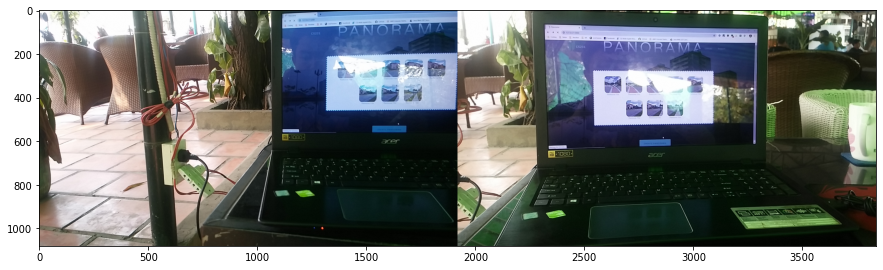

In [24]:
plt_img = np.concatenate((list_images2[0], list_images2[1]), axis=1)
plt.figure(figsize=(15,15))
plt.imshow(convertResult(plt_img))

In [26]:
#          -------------warpTwoImages--------------  
# warpTwoImages(src_img, dst_img, showstep=False)   warpTwoImages(list_images2[1],list_images2[0],True)
src_img = list_images2[1]
dst_img = list_images2[0]
# H, _ = features.generateHomography(src_img, dst_img)

# src_kp, src_features = findAndDescribeFeatures(src_img)
# dst_kp, dst_features = findAndDescribeFeatures(dst_img)

# findAndDescribeFeatures(image, opt="ORB"):
grayImage1 = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
grayImage2 = cv2.cvtColor(dst_img, cv2.COLOR_BGR2GRAY)
md = cv2.xfeatures2d.SURF_create()
src_kp, src_features = md.detectAndCompute(grayImage1, None)
src_features = np.float32(src_features)
dst_kp, dst_features = md.detectAndCompute(grayImage2, None)
dst_features = np.float32(dst_features)
print(type(src_kp),type(src_features))

<class 'list'> <class 'numpy.ndarray'>


In [28]:
print("src_kp : ",len(src_kp),' src_kp shape:', src_features.shape,' size:', src_features.size)
print("dst_kp : ",len(src_kp),' dst_kp shape:', dst_features.shape,' size:', dst_features.size)

src_kp :  9990  src_kp shape: (9990, 64)  size: 639360
dst_kp :  9990  dst_kp shape: (11830, 64)  size: 757120


In [32]:

featuresA = src_features
featuresB = dst_features
# generateHomography:
# good = matchFeatures(src_features, dst_features)
# matchFeatures(featuresA, featuresB, ratio=0.75, opt="FB")
# featureMatcher = cv2.DescriptorMatcher_create("FlannBased")
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
featureMatcher = cv2.FlannBasedMatcher(index_params, search_params)

# performs k-NN matching between the two feature vector sets using k=2
# (indicating the top two matches for each feature vector are returned).
matches = featureMatcher.knnMatch(featuresA, featuresB, k=2)
ratio=0.75
# store all the good matches as per Lowe's ratio test.
good = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good.append(m)
if len(good) > 4:
    print("成功 len(good) ",len(good))


成功 len(good)  882


In [35]:
print("matches ",type(matches),len(matches),matches[0])

matches  <class 'list'> 9990 [<DMatch 00000221AA579410>, <DMatch 00000221AA342450>]
